<a href="https://colab.research.google.com/github/musicjae/intro_to_python/blob/master/Pytorch/pytorch_studying(5)__Learning_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고: 파이썬 딥러닝 파이토치, 정보문화사


# 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn # 신경망 설계시 필요
import torch.nn.functional as F #nn중에서도 자주 사용되는 거 모음
from torchvision import transforms, datasets # 비전 연구에서 자주 사용하는 transform, datasets

In [2]:
## 장비 확인

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Pytorch 버전: ', torch.__version__, '장치: ', DEVICE)

Pytorch 버전:  1.7.0+cu101 장치:  cuda


In [3]:
## HYPER PARAMETER

BATCH_SIZE = 32 # 미니배치 1 개가 32 개의 데이터로 구성됨을 의미
EPOCHS = 5 # 역전파 시 가중치를 업데이트. epochs 내의 미니 배치를 전부 이용한 횟수 의미

# 데이터 로드 및 전처리

In [4]:
train_dataset = datasets.MNIST(root='../data/MNIST',
                               train=True, # 학습용 데이터 / False 시 검증용
                               download=True,
                               transform=transforms.ToTensor()) # 다운 받은 img 파일을 학습을 위한 Tensor로 바꿔줌
                                                                # 이미지는 0 - 255 값으로 되어 있는데, 이 값을 0 - 1  내의 실수로 정규화해준다. (과적합 방지) 
test_dataset = datasets.MNIST(root='../data/MNIST',
                               train=False, # 학습용 데이터 / False 시 검증용
                               transform=transforms.ToTensor()) # 다운 받은 img 파일을 학습을 위한 Tensor로 바꿔줌

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw


Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw


Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, # 다운로드한 데이터셋을 ""미니 배치 단위""로 분리해서 지정. 여기서는 32 개의 이미지를 묶어 하나의 미니배치로 이용
                                           batch_size = BATCH_SIZE,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle=False)

# 데이터 확인

In [6]:
for(X_train, y_train) in train_loader:
    print(f'X_train: {X_train.size()}, type: {X_train.type()}')
    print(f'y_train: {y_train.size()}, type: {y_train.type()}')
    break



X_train: torch.Size([32, 1, 28, 28]), type: torch.FloatTensor
y_train: torch.Size([32]), type: torch.LongTensor


이미지: 배치, 깊이(rgb 3), 이미지 사이즈(28, 28)

데이터 확인 시각화

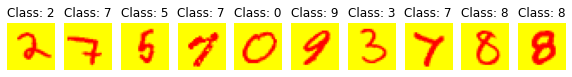

In [7]:
pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap='autumn_r')
    plt.title('Class: '+str(y_train[i].item()))

cmap:  
  
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r.

# 모델링

## Vanila MLP

In [8]:
## modeling ##

class Net(nn.Module): # 모듈 클래스에 있는 것을 상속받아 사용하게 해준다
    def __init__(self): # Net 클래스 인스턴스 생성 시, 지닐 attributes를 정의
        super(Net, self).__init__() # 모듈 내의 메서드 상속
        self.fc1 = nn.Linear(28*28,512) # 입력 차원은 이미지 크기의 노드 수, 임베딩 차원은 FCnet의 노드 수
        self.fc2 = nn.Linear(512,256) 
        self.fc3 = nn.Linear(256,10) # 숫자가 0-9까지 10 개 있으니까 10 개로 다중 분류를 위해 10개로 출력 이것은 원핫인코딩 됨.

    def forward(self, x):
        x = x.view(-1,28*28) # MLP 모델은 1차원 벡터값을 받는다. 하지만 이미지 데이터는 크기가 28*28인 2차원 데이터기에, 1차원으로 바꿔주기 위해 데이터 변환 시도. (Flatten)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x,dim=-1) # log 소프트맥스를 사용한 이유는, loss값의 grad 계산 시, explosion으로부터 방지.
        return x

## MLP with Dropout

In [18]:
## modeling ##

class Net2(nn.Module): # 모듈 클래스에 있는 것을 상속받아 사용하게 해준다
    def __init__(self): # Net 클래스 인스턴스 생성 시, 지닐 attributes를 정의
        super(Net2, self).__init__() # 모듈 내의 메서드 상속
        self.fc1 = nn.Linear(28*28,512) # 입력 차원은 이미지 크기의 노드 수, 임베딩 차원은 FCnet의 노드 수
        self.fc2 = nn.Linear(512,256) 
        self.fc3 = nn.Linear(256,10) # 숫자가 0-9까지 10 개 있으니까 10 개로 다중 분류를 위해 10개로 출력 이것은 원핫인코딩 됨.
        self.dropout_prob = 0.3 # 몇 %의 노드를 계산하지 않을 것인가를 설정 ==> 랜덤하게 이 확률로 노드를 선택하여 가중치 업데이트 x 하게 만든다. (이제 forward에서 dropout 참조해보자.)

    def forward(self, x):
        x = x.view(-1,28*28) # MLP 모델은 1차원 벡터값을 받는다. 하지만 이미지 데이터는 크기가 28*28인 2차원 데이터기에, 1차원으로 바꿔주기 위해 데이터 변환 시도. (Flatten)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob) # 학습 시에는 랜덤하게 노드 제외된 뒤에 조정되지만, 평가 시에는 모든 노드가 조정되기 때문에, 이 같이 명시적으로 학습 경우라고 적어준다.
        x = self.fc2(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1) # log 소프트맥스를 사용한 이유는, loss값의 grad 계산 시, explosion으로부터 방지.
        return x

## MLP with Dropout + BN

BN이 활성화 함수 이전에 사용되는가, 이후에 사용되는가는 비합의된 주제.

In [27]:
## modeling ##

class Net3(nn.Module): # 모듈 클래스에 있는 것을 상속받아 사용하게 해준다
    def __init__(self): # Net 클래스 인스턴스 생성 시, 지닐 attributes를 정의
        super(Net3, self).__init__() # 모듈 내의 메서드 상속
        self.fc1 = nn.Linear(28*28,512) # 입력 차원은 이미지 크기의 노드 수, 임베딩 차원은 FCnet의 노드 수
        self.fc2 = nn.Linear(512,256) 
        self.fc3 = nn.Linear(256,10) # 숫자가 0-9까지 10 개 있으니까 10 개로 다중 분류를 위해 10개로 출력 이것은 원핫인코딩 됨.
        self.dropout_prob = 0.3 # 몇 %의 노드를 계산하지 않을 것인가를 설정 ==> 랜덤하게 이 확률로 노드를 선택하여 가중치 업데이트 x 하게 만든다. (이제 forward에서 dropout 참조해보자.)
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)

    def forward(self, x):
        x = x.view(-1,28*28) # MLP 모델은 1차원 벡터값을 받는다. 하지만 이미지 데이터는 크기가 28*28인 2차원 데이터기에, 1차원으로 바꿔주기 위해 데이터 변환 시도. (Flatten)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob) # 학습 시에는 랜덤하게 노드 제외된 뒤에 조정되지만, 평가 시에는 모든 노드가 조정되기 때문에, 이 같이 명시적으로 학습 경우라고 적어준다.
        x = self.fc2(x)
        x= self.batch_norm2(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1) # log 소프트맥스를 사용한 이유는, loss값의 grad 계산 시, explosion으로부터 방지.
        return x

# MLP with Dropout + BN + He init  
  
- He: Xavier init은 Relu 사용 시 비효율적.  
  이것을 보완하기 위해, He 초기화 등장

In [40]:
import torch.nn.init as init

def weight_init(m):
    if isinstance(m, nn.Linear): # 모델을 구성하고 있는 것들 중 오직 ""nn.Linear""에 해당하는 파라미터만을 지정
        init.kaiming_uniform_(m.weight.data)

In [41]:
## modeling ##

class Net4(nn.Module): # 모듈 클래스에 있는 것을 상속받아 사용하게 해준다
    def __init__(self): # Net 클래스 인스턴스 생성 시, 지닐 attributes를 정의
        super(Net4, self).__init__() # 모듈 내의 메서드 상속
        self.fc1 = nn.Linear(28*28,512) # 입력 차원은 이미지 크기의 노드 수, 임베딩 차원은 FCnet의 노드 수
        self.fc2 = nn.Linear(512,256) 
        self.fc3 = nn.Linear(256,10) # 숫자가 0-9까지 10 개 있으니까 10 개로 다중 분류를 위해 10개로 출력 이것은 원핫인코딩 됨.
        self.dropout_prob = 0.3 # 몇 %의 노드를 계산하지 않을 것인가를 설정 ==> 랜덤하게 이 확률로 노드를 선택하여 가중치 업데이트 x 하게 만든다. (이제 forward에서 dropout 참조해보자.)
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)

    def forward(self, x):
        x = x.view(-1,28*28) # MLP 모델은 1차원 벡터값을 받는다. 하지만 이미지 데이터는 크기가 28*28인 2차원 데이터기에, 1차원으로 바꿔주기 위해 데이터 변환 시도. (Flatten)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob) # 학습 시에는 랜덤하게 노드 제외된 뒤에 조정되지만, 평가 시에는 모든 노드가 조정되기 때문에, 이 같이 명시적으로 학습 경우라고 적어준다.
        x = self.fc2(x)
        x= self.batch_norm2(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1) # log 소프트맥스를 사용한 이유는, loss값의 grad 계산 시, explosion으로부터 방지.
        return x

In [42]:
model_4 =  Net4().to(DEVICE)
model.apply(weight_init) ## 위에서 설정한 he 초기화를 모델에 적용
optimizer = torch.optim.RMSprop(model.parameters(), lr= 0.01, momentum=0.3)
criterion = nn.CrossEntropyLoss()

# 옵티마이저,목적함수

In [28]:
model = Net3().to(DEVICE) # cuda or cpu에 모델 할당
optimizer = torch.optim.RMSprop(model.parameters(), lr= 0.01, momentum=0.3)
criterion = nn.CrossEntropyLoss()

In [29]:
print(model)

Net3(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


# 학습

In [43]:
def train(model, train_loader, optimizer, log_interval):
    model_4.train() # 모델을 학습상태로 지정
    for batch_idx, (image, label) in enumerate(train_loader): # 미니배치 단위로 저장된 train_loader. 이것은 img--label 쌍으로 저장되어 있다.
        image = image.to(DEVICE) # 장비에 이미지 할당 to train the model
        label = label.to(DEVICE) # Allocate label into cuda or cpu to train the model
        optimizer.zero_grad() # Init previous grad in optimizer. Because In the case that we  allocated img, label into the DEVICE, they are stored in the optimizer we used. However, in new training session, we don't need them
        output = model(image) # Compute output using input data in the model we defined
        loss = criterion(output,label) # Use crossentropy to compute Loss
        loss.backward() # Compute Backprop and allocate the computed values into each param
        optimizer.step() # Update params using the allocated grads
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
                Epoch, batch_idx*len(image),
                len(train_loader.dataset),
                100*batch_idx/len(train_loader),
                loss.item()
            ))

# 평가

In [44]:
def evaluate(model, test_loader):
    model_4.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad(): # At the eval step, restrict the grad flow by using 'torch.no_grad()' to avoid param update through grads
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item() # add sum loss btn pred & correct into test_loss
            prediction = output.max(1, keepdim = True)[1] # The output is vector that it has 10 shape. We regard it as the class corresponded to the position in question that the max value in the compute vectors.
            correct += prediction.eq(label.view_as(prediction)).sum().item() # If final pred value was correct, store its count
             
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100 * correct / len(test_loader.dataset)
    
    return test_loss, test_accuracy

# 실행

In [45]:
for Epoch in range(1, EPOCHS+1):
    train(model_4,train_loader,optimizer,log_interval=200)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('\n[EPOCH: {}], \t TEST LOSS: {:.4f}, \tTest Accuracy: {:.2f} %\n'.format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.417772
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.419003
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 2.453576
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 2.376590
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 2.443652
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 2.402633
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 2.316510
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 2.324033
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 2.479839
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 2.492748

[EPOCH: 1], 	 TEST LOSS: 0.0741, 	Test Accuracy: 9.74 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 2.400643
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 2.344064
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 2.393891
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 2.337710
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 2.441800
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 2.350724
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 2.394619
Train Epoch: 2 [448

- MLP dropout:  
    TEST LOSS: 0.0117, 	Test Accuracy: 92.44 %
- MLP dropout + BN :  
     TEST LOSS: 0.0029, 	Test Accuracy: 97.48 %